# 4.9.2 Order Product Customer Visualization
## 0.1 Initialization
## 0.2 First graphs within exercise
## 0.3 Task part 2 graphs
### 0.3.1 Histogram of orders per hour of the day
### 0.3.2 Line chart of orders by hour of day and prices
### 0.3.3 Bar Chart of Loyalty Flag distribution
### 0.3.4 Line chart of age vs number of dependants
### 0.3.5 Scatterplot of age vs income

## 0.1 Initialization

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = '/Users/matthewmacbook/Documents/CareerFoundry/Data Immersion/Achievement 4 - Python Fundamentals for Data Analysts/Instacart Basket Analysis 26-07-2023'

## 0.2 First graphs within exercise

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_busy.pkl'))

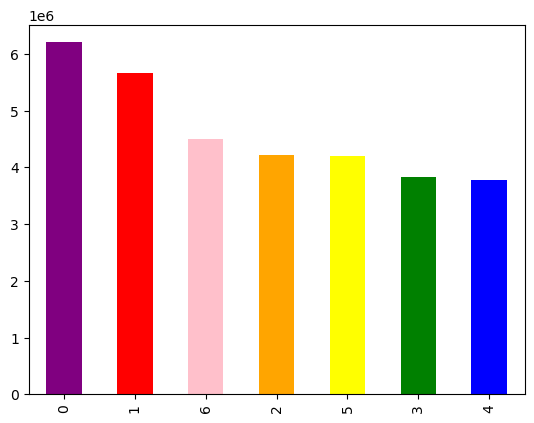

In [4]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [5]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

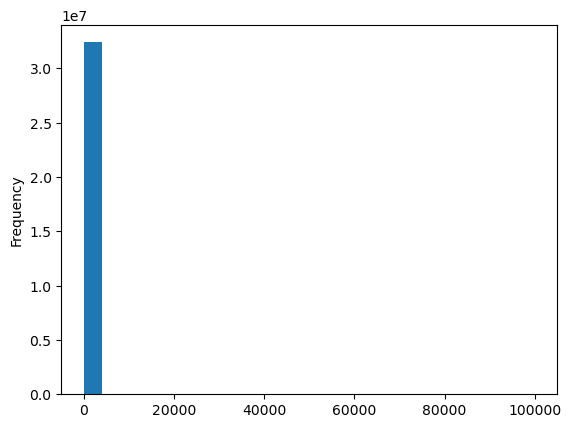

In [6]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [7]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

<Axes: ylabel='Frequency'>

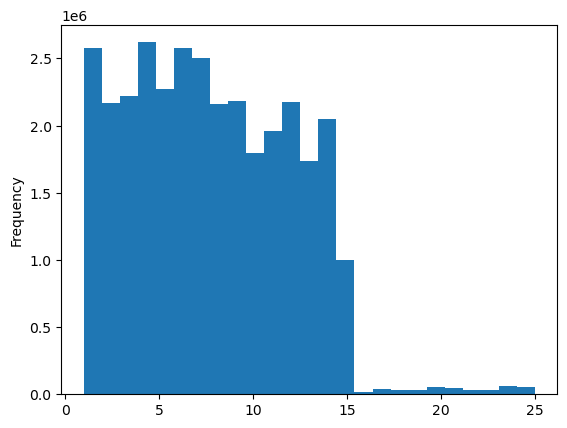

In [8]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

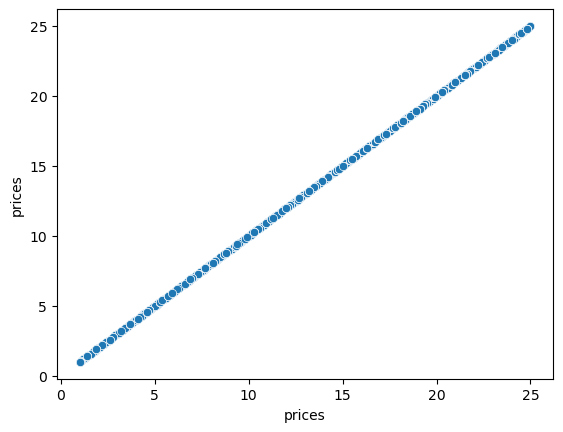

In [9]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [10]:
np.random.seed(4)

In [11]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [12]:
big = ords_prods_merge[dev]

In [13]:
small = ords_prods_merge[~dev]

In [14]:
len(ords_prods_merge)

32404859

In [15]:
len(big) + len(small)

32404859

In [16]:
df_1 = small[['orders_day_of_week','prices']]

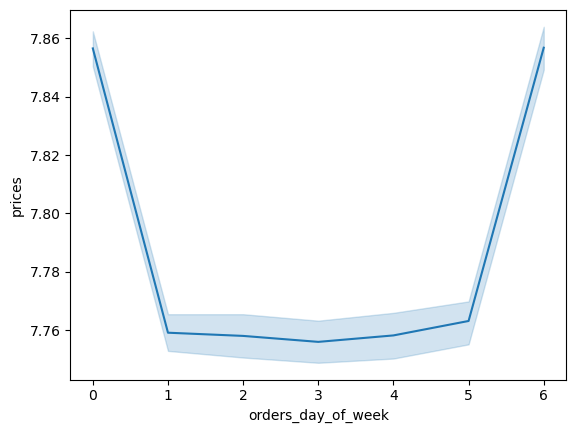

In [17]:
line = sns.lineplot(data = df_1, x = 'orders_day_of_week',y = 'prices')

## 0.3 Task part 2 graphs

In [4]:
# import order-products-customers dataset
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [33]:
ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency_median,order_frequency_flag,Gender,State,Age,date_joined,number_dependents,family_status,Income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


### 0.3.1 Histogram of orders per hour of the day

Text(0.5, 0, 'Hour of Day')

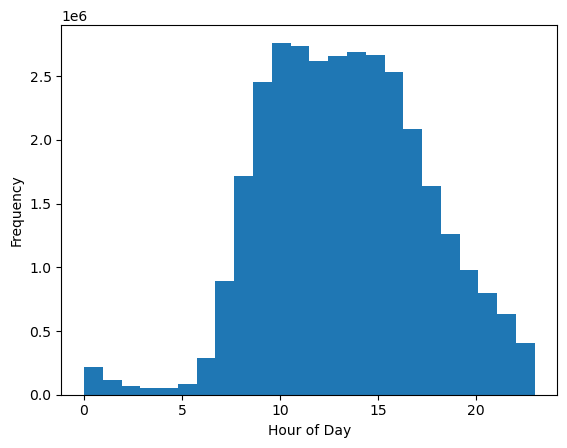

In [5]:
# create a histogram of 'order_hour_of_day' column with 24 columns
histogram_order_hour = ords_prods_custs['order_hour_of_day'].plot.hist(bins = 24)

# Add x-axis label
plt.xlabel('Hour of Day')

Many orders are placed starting around 10 AM to 5 PM

In [6]:
histogram_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour.png'))

### 0.3.2 Line chart of orders by hour of day and prices

In [37]:
# create a random seed with values between 0 and 1
np.random.seed(8)

In [38]:
# create dev_2 boolean list of length equal to the length of the ords-prods-custs dataframe based on the random seed 
dev_2 = np.random.rand(len(ords_prods_custs)) <= 0.7

In [39]:
# use dev_2 to only select a subset of ords-prods-custs for 70% 
big_2 = ords_prods_custs[dev]

In [40]:
# use NOT dev_2 to only select a subset of ords-prods-custs for 30%
small_2 = ords_prods_custs[~dev]

In [41]:
# create a smaller subset df_2 of ords-prods-custs dataset using only 2 columns
df_2 = small_2[['order_hour_of_day','prices']]

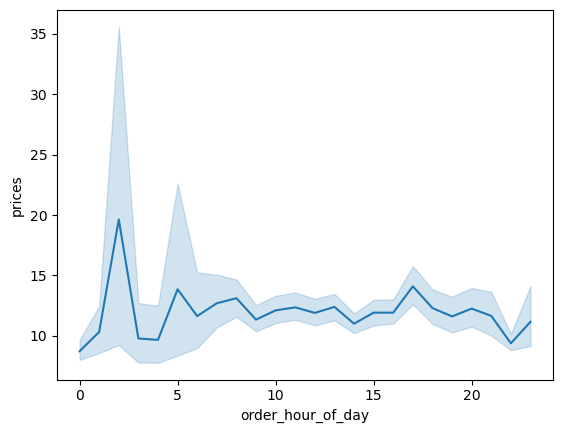

In [42]:
# lineplot using df_2
line_order_hour_prices = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

There are 2 major findings. First, the early hours of the day, from midnight to 6 AM, has a lot fo variance in price per order. The second observation is that 10 AM has a low price per order. More research would need to be done to understand this discrepancy. 

In [43]:
line_order_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_prices.png'))

### 0.3.3 Bar Chart of Loyalty Flag distribution

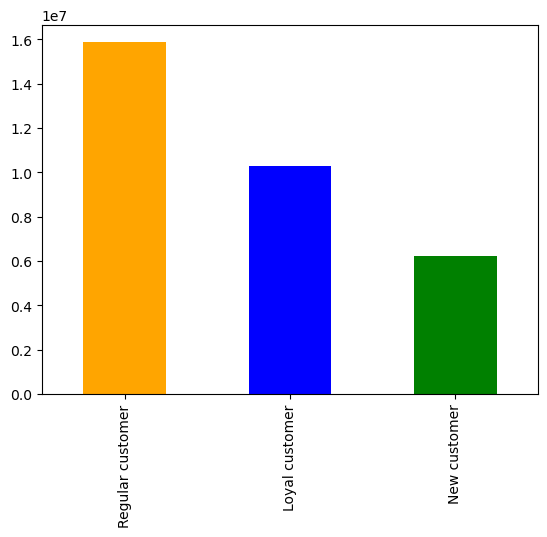

In [44]:
# create a bar chart using loyalty flag distribution
bar_loyalty = ords_prods_custs['loyalty_flag'].value_counts().plot.bar(color =['orange', 'blue', 'green'])

In [45]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

### 0.3.4 Line chart of age vs number of dependents

In [46]:
# create a subset df_3 of ords-prods-custs using 2 columns
df_3 = small_2[['Age','number_dependents']]

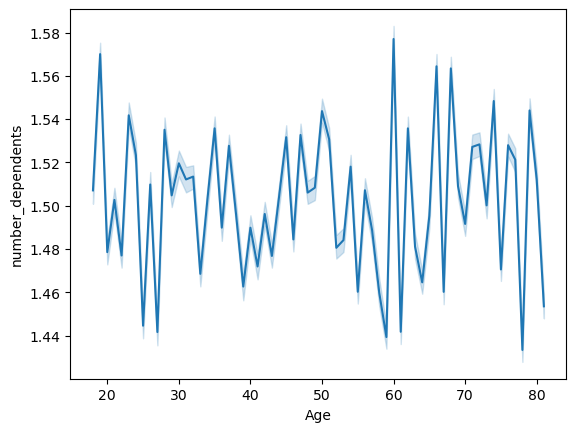

In [47]:
# create a line chart using df_3
line_age_dependents = sns.lineplot(data = df_3, x = 'Age',y = 'number_dependents')

There is no significant trendline between age and number of dependants.

In [48]:
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

### 0.3.5 Scatterplot of age vs income

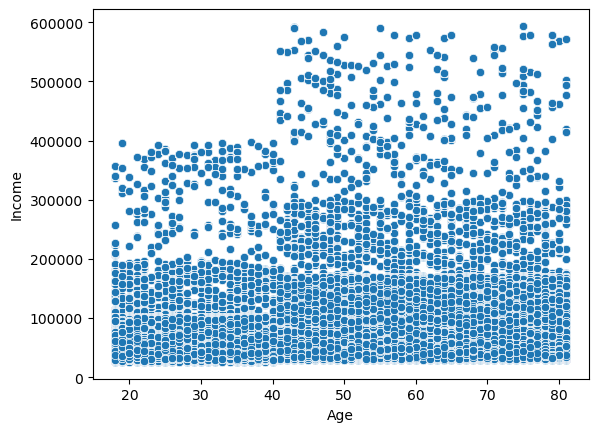

In [49]:
scatter_age_income = sns.scatterplot(x = 'Age', y = 'Income',data = small_2)

There is a major threshold at 40 years and onwards of more individuals having significantly increased income. We see that no individual younger than 40 has an income above $\$$400,000 while there are a signifcant amount of indivudals with incomes above $\$$400,000. 

Another major difference is again that there are significantly more individuals over 40 with incomes between $\$$200,000 and $\$$300,000.

In [50]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))